In [2]:
import matplotlib.pyplot as plt
import numpy as np
from optimize_vars import make_virus
from Virus import GLOBAL_N
from time import *
from scipy.integrate import solve_ivp
import cython

UsageError: Line magic function `%cython` not found.


In [3]:
cont_params = {
    'x': np.array([ 0.71534496,  0.22803664,  0.48380948, 20.97253698,  0.19946303,0.02189386]),
    'kappa_array': [0.07039722784832704, 0.19512893239089457, 0.19466880988185178, 0.1832622137179662, 0.10308514535244785, 0.16455087939649646],
    'contact_trace': 0.00027800552003383127,
    'y0': np.array([ 3.58795629e+06,  6.29179911e+04,  8.34779371e+03,  6.48365014e+04,
        6.93237159e+09, -4.31803955e+09, -6.93215512e+09,  8.57448508e+04,
        4.31804921e+09,  3.97476917e+06]),
    'm_array': [0.38944077054215026, 0.0017922737890156248, 0.0006701231750814447, 0.0008443027411139767, 0.0041535702965665175],
    'vaccine_parameters': np.array([0.38147348, 0.03395146, 0.78936041])
}

In [4]:
test_virus = make_virus(cont_params)

In [6]:
methods = ['RK45', 'Radau', 'DOP853', 'BDF', 'LSODA']
t_min = 0
t_max_array = [25 * i for i in range(1, 15)]
N = GLOBAL_N
y0 = np.array([N, 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float)
time_dict = {"RK45" : [], "Radau" : [], "DOP853" : [], 'BDF' : [], "LSODA" : []}

print("integration time per increasing time for each method:")

for t_max in t_max_array:
    print(f"max t for integration {t_max}")
    for method in methods:
        time_sum = 0
        for i in range(15):
            start = time()
            sol = solve_ivp(
                    test_virus.derivatives,
                    (t_min, t_max),
                    y0=y0,
                    t_eval=np.arange(t_min, t_max),
                    method=method,
            )
            end = time()
            time_sum += end - start
        time_mean = time_sum/10
        time_dict[method].append(time_mean)
        print(f"    method : {method} - time : {time_mean}")

integration time per increasing time for each method:
max t for integration 25
    method : RK45 - time : 0.0270078182220459
    method : Radau - time : 0.04172582626342773
    method : DOP853 - time : 0.05086045265197754
    method : BDF - time : 0.04077589511871338
    method : LSODA - time : 0.030349183082580566
max t for integration 50
    method : RK45 - time : 0.05306031703948975
    method : Radau - time : 0.1347031593322754
    method : DOP853 - time : 0.11563675403594971
    method : BDF - time : 0.09525487422943116
    method : LSODA - time : 0.06289584636688232
max t for integration 75
    method : RK45 - time : 0.12843081951141358
    method : Radau - time : 0.264538836479187
    method : DOP853 - time : 0.2403646230697632
    method : BDF - time : 0.21707894802093505
    method : LSODA - time : 0.14724738597869874
max t for integration 100
    method : RK45 - time : 0.15163748264312743
    method : Radau - time : 0.34947364330291747
    method : DOP853 - time : 0.273986434

In [7]:
for method in methods:
    print(f"method : {method} - mean time {np.mean(time_dict[method])}")

method : RK45 - mean time 0.45983837502343317
method : Radau - mean time 0.8982679384095329
method : DOP853 - mean time 1.0841626916612896
method : BDF - mean time 0.6454029645238604
method : LSODA - mean time 0.57011216708592


RK45 = b--


C:\ProgramData\Anaconda3\envs\Moach\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: unhashable type: 'list'

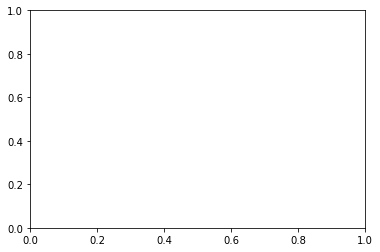

In [30]:
color_arr = ['b--', 'g--', 'r--', 'y--', 'm--']
for color, method in zip(color_arr, methods):
    print(f'{method} = {color}')
    plt.plot(t_max_array, time_dict[method], color)